# Kapitel 0: Grundbegriffe, Messniveaus und Statistik-Workflow

**Statistik -- DHBW Stuttgart**

Dieses Notebook behandelt die grundlegenden Begriffe der Statistik, die vier Skalentypen (Messniveaus), den Unterschied zwischen deskriptiver und induktiver Statistik sowie den typischen Statistik-Workflow.

> **Lernziele:**  
> (i) Statistische Einheit, Merkmal, Merkmalsauspraegung, Grundgesamtheit und Stichprobe sicher unterscheiden,  
> (ii) Skalentypen erkennen und zulaessige Auswertungen ableiten,  
> (iii) den Unterschied zwischen Deskription und Induktion erklaeren,  
> (iv) den typischen Ablauf einer statistischen Analyse beschreiben.

**Autor:** Karsten Kessler  
**Zielgruppe:** Studierende der Informatik

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from collections import Counter

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = 12
np.random.seed(42)

pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 120)

---

## 1. Grundbegriffe der Statistik

Bevor wir Daten analysieren koennen, muessen wir die grundlegenden Begriffe sauber definieren.  
Diese Begriffe bilden das Vokabular, mit dem wir statistische Fragestellungen praezise formulieren.

### 1.1 Statistische Einheit (Merkmalstraeger)

Die **statistische Einheit** ist das Objekt, ueber das Daten erhoben werden (kleinste Untersuchungseinheit).

**Beispiele:**
- Ein gefertigtes Bauteil in der Produktion
- Ein Patient in einer klinischen Studie
- Eine Bestellung im Online-Handel
- Ein Arbeitnehmer in der Personalstatistik
- Ein Haushalt in einer Volkszaehlung

In [2]:
# Beispiel: Statistische Einheiten -- Bestellungen eines Online-Shops
# Jede Zeile = eine statistische Einheit (hier: eine Bestellung)

bestellungen = {
    'Bestell-Nr': ['B-001', 'B-002', 'B-003', 'B-004', 'B-005'],
    'Produktkategorie': ['Elektronik', 'Kleidung', 'Lebensmittel', 'Moebel', 'Elektronik'],
    'Bestellwert (EUR)': [89.90, 45.50, 32.10, 299.00, 159.95],
    'Lieferzeit (Tage)': [3, 5, 1, 12, 4],
    'Zahlungsart': ['Kreditkarte', 'PayPal', 'Lastschrift', 'Rechnung', 'Kreditkarte']
}

df_best = pd.DataFrame(bestellungen)
print("=" * 70)
print("STATISTISCHE EINHEITEN: Bestellungen eines Online-Shops")
print("=" * 70)
print(f"\nJede Zeile ist eine statistische Einheit (eine Bestellung).")
print(f"Jede Spalte ist ein Merkmal.\n")
print(df_best.to_string(index=False))
print(f"\n-> Wir haben {len(df_best)} statistische Einheiten mit je {len(df_best.columns)-1} Merkmalen.")

STATISTISCHE EINHEITEN: Bestellungen eines Online-Shops

Jede Zeile ist eine statistische Einheit (eine Bestellung).
Jede Spalte ist ein Merkmal.

Bestell-Nr Produktkategorie  Bestellwert (EUR)  Lieferzeit (Tage) Zahlungsart
     B-001       Elektronik              89.90                  3 Kreditkarte
     B-002         Kleidung              45.50                  5      PayPal
     B-003     Lebensmittel              32.10                  1 Lastschrift
     B-004           Moebel             299.00                 12    Rechnung
     B-005       Elektronik             159.95                  4 Kreditkarte

-> Wir haben 5 statistische Einheiten mit je 4 Merkmalen.


### 1.2 Merkmal und Merkmalsauspraegung

- **Merkmal:** Eigenschaft der statistischen Einheit (z. B. *Lieferzeit*)
- **Merkmalsauspraegung:** konkret beobachteter Wert (z. B. *3 Tage*)

**Mini-Beispiel:**  
Einheit = Bestellung | Merkmal = Lieferzeit | Auspraegung = 3 Tage

In [3]:
# Beispiel: Merkmale und ihre Auspraegungen

merkmale_bsp = {
    'Einheit': ['Bestellung', 'Bestellung', 'Bestellung',
                'Mitarbeiter', 'Mitarbeiter', 'Mitarbeiter'],
    'Merkmal': ['Lieferzeit', 'Bestellwert', 'Status',
                'Gehalt', 'Abteilung', 'Berufserfahrung'],
    'Auspraegung': ['5 Tage', '89,90 EUR', 'Versendet',
                    '3.200 EUR', 'Vertrieb', '7 Jahre']
}

df_m = pd.DataFrame(merkmale_bsp)
print("=" * 70)
print("MERKMALE UND MERKMALSAUSPRAEGUNGEN")
print("=" * 70)
print()
print(df_m.to_string(index=False))
print("\n-> Dieselbe Einheit kann viele verschiedene Merkmale besitzen.")
print("-> Merkmale koennen numerisch (Gehalt, Lieferzeit) oder kategorial (Abteilung, Status) sein.")

MERKMALE UND MERKMALSAUSPRAEGUNGEN

    Einheit         Merkmal Auspraegung
 Bestellung      Lieferzeit      5 Tage
 Bestellung     Bestellwert   89,90 EUR
 Bestellung          Status   Versendet
Mitarbeiter          Gehalt   3.200 EUR
Mitarbeiter       Abteilung    Vertrieb
Mitarbeiter Berufserfahrung     7 Jahre

-> Dieselbe Einheit kann viele verschiedene Merkmale besitzen.
-> Merkmale koennen numerisch (Gehalt, Lieferzeit) oder kategorial (Abteilung, Status) sein.


### 1.3 Grundgesamtheit und Stichprobe

- **Grundgesamtheit:** alle relevanten Einheiten, ueber die eine Aussage getroffen werden soll
- **Stichprobe:** tatsaechlich beobachtete Teilmenge

**Beispiele:**

| Grundgesamtheit | Stichprobe |
|:----------------|:-----------|
| Alle Kunden eines Unternehmens (50.000) | 500 zufaellig ausgewaehlte Kunden |
| Alle produzierten Bauteile eines Monats (100.000) | 500 gepruefete Teile |
| Alle Schueler eines Bundeslandes | 2.000 Schueler einer PISA-Studie |
| Alle potenziellen Kaeufer | Fokusgruppe mit 20 Testpersonen |

In [4]:
# Beispiel: Grundgesamtheit vs. Stichprobe
# Simuliere Lieferzeiten eines Versandhaendlers

np.random.seed(42)

N = 50_000
grundgesamtheit = np.random.lognormal(mean=1.2, sigma=0.5, size=N)

n = 200
stichprobe = np.random.choice(grundgesamtheit, size=n, replace=False)

print("=" * 70)
print("GRUNDGESAMTHEIT vs. STICHPROBE")
print("=" * 70)
print(f"\nGrundgesamtheit: {N:,} Lieferungen")
print(f"  Mittelwert:    {np.mean(grundgesamtheit):.2f} Tage")
print(f"  Median:        {np.median(grundgesamtheit):.2f} Tage")
print(f"  Std.abw.:      {np.std(grundgesamtheit):.2f} Tage")
print(f"\nStichprobe: {n} Lieferungen (zufaellig ausgewaehlt)")
print(f"  Mittelwert:    {np.mean(stichprobe):.2f} Tage")
print(f"  Median:        {np.median(stichprobe):.2f} Tage")
print(f"  Std.abw.:      {np.std(stichprobe):.2f} Tage")
print(f"\n-> Die Stichprobe schaetzt die Grundgesamtheit -- aber nie perfekt!")
print(f"   Abweichung Mittelwert: {abs(np.mean(grundgesamtheit) - np.mean(stichprobe)):.2f} Tage")

GRUNDGESAMTHEIT vs. STICHPROBE

Grundgesamtheit: 50,000 Lieferungen
  Mittelwert:    3.76 Tage
  Median:        3.32 Tage
  Std.abw.:      2.00 Tage

Stichprobe: 200 Lieferungen (zufaellig ausgewaehlt)
  Mittelwert:    3.91 Tage
  Median:        3.35 Tage
  Std.abw.:      2.11 Tage

-> Die Stichprobe schaetzt die Grundgesamtheit -- aber nie perfekt!
   Abweichung Mittelwert: 0.15 Tage


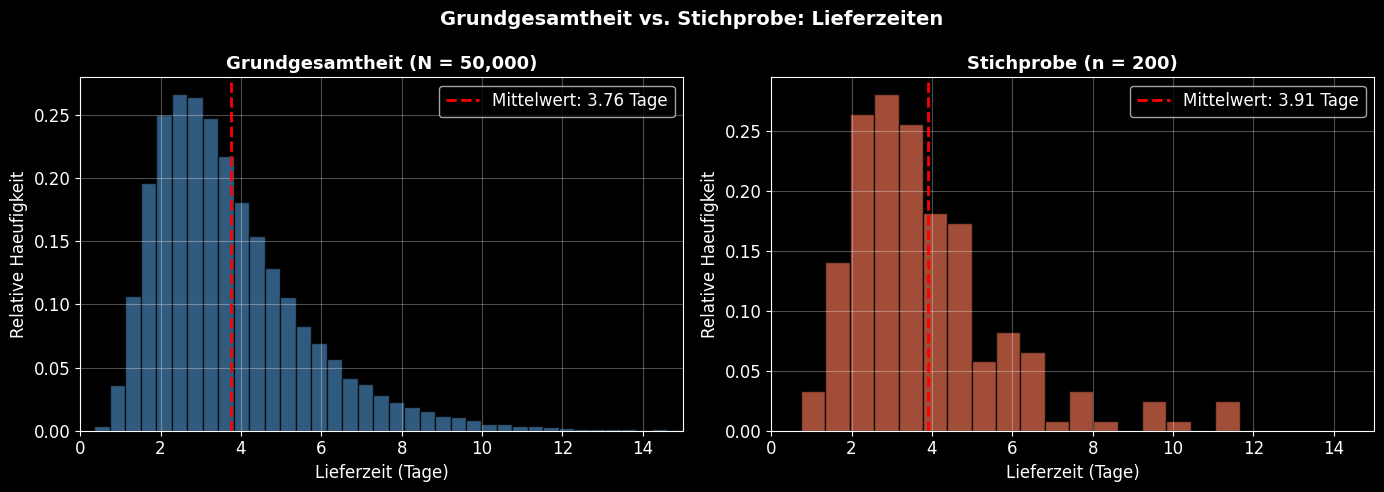

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.hist(grundgesamtheit, bins=80, edgecolor='black', alpha=0.7, color='steelblue', density=True)
ax1.axvline(np.mean(grundgesamtheit), color='red', linestyle='--', linewidth=2,
            label=f'Mittelwert: {np.mean(grundgesamtheit):.2f} Tage')
ax1.set_xlabel('Lieferzeit (Tage)')
ax1.set_ylabel('Relative Haeufigkeit')
ax1.set_title(f'Grundgesamtheit (N = {N:,})', fontsize=13, fontweight='bold')
ax1.legend()
ax1.set_xlim(0, 15)
ax1.grid(alpha=0.3)

ax2.hist(stichprobe, bins=25, edgecolor='black', alpha=0.7, color='#E76F51', density=True)
ax2.axvline(np.mean(stichprobe), color='red', linestyle='--', linewidth=2,
            label=f'Mittelwert: {np.mean(stichprobe):.2f} Tage')
ax2.set_xlabel('Lieferzeit (Tage)')
ax2.set_ylabel('Relative Haeufigkeit')
ax2.set_title(f'Stichprobe (n = {n})', fontsize=13, fontweight='bold')
ax2.legend()
ax2.set_xlim(0, 15)
ax2.grid(alpha=0.3)

plt.suptitle('Grundgesamtheit vs. Stichprobe: Lieferzeiten', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 1.4 Repraesentativitaet und Bias

Die Stichprobe soll die Grundgesamtheit moeglichst gut abbilden.  
**Verzerrungen (Bias)** fuehren zu falschen Schlussfolgerungen.

**Typische Bias-Arten:**

| Bias-Art | Beschreibung | Beispiel |
|:---------|:-------------|:---------|
| **Survivorship Bias** | Nur verbleibende Daten analysiert | Nur zufriedene Kunden geben Feedback |
| **Selection Bias** | Systematisch verzerrte Auswahl | Nur Vielkaeufer in Umfrage befragt |
| **Temporal Bias** | Zeitliche Verzerrung | Daten nur von Werktagen, nicht Wochenenden |
| **Sampling Bias** | Nicht-repraesentative Stichprobe | Befragung nur in einer Stadt statt bundesweit |
| **Measurement Bias** | Messung beeinflusst Ergebnis | Beobachtung veraendert Kundenverhalten |

SURVIVORSHIP BIAS: Unzufriedene Kunden fehlen in der Umfrage

Alle Kunden:    5,000
Noch aktiv:     4,224 (unzufriedene haben gekuendigt)
Fehlend:        776 (15.5 %)

Wahre mittlere Zufriedenheit:    5.52
Verzerrte mittlere Zufriedenheit: 6.18

-> Die gemessene Zufriedenheit erscheint 0.66 Punkte hoeher!


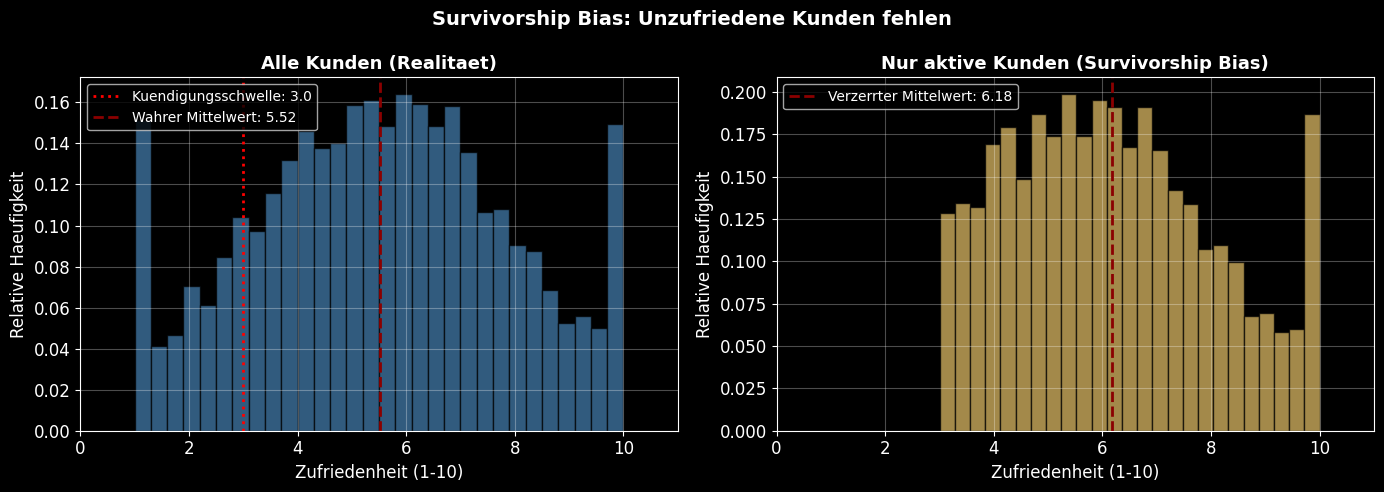

In [6]:
# Beispiel: Survivorship Bias bei Kundenzufriedenheit

np.random.seed(42)

n_total = 5000
alle_kunden = np.random.normal(loc=5.5, scale=2.5, size=n_total)
alle_kunden = np.clip(alle_kunden, 1, 10)

# Kunden mit Zufriedenheit < 3 kuendigen und fehlen in der Umfrage
schwelle = 3.0
aktive_kunden = alle_kunden[alle_kunden >= schwelle]

print("=" * 70)
print("SURVIVORSHIP BIAS: Unzufriedene Kunden fehlen in der Umfrage")
print("=" * 70)
print(f"\nAlle Kunden:    {n_total:,}")
print(f"Noch aktiv:     {len(aktive_kunden):,} (unzufriedene haben gekuendigt)")
print(f"Fehlend:        {n_total - len(aktive_kunden):,} ({(n_total - len(aktive_kunden))/n_total*100:.1f} %)")
print(f"\nWahre mittlere Zufriedenheit:    {np.mean(alle_kunden):.2f}")
print(f"Verzerrte mittlere Zufriedenheit: {np.mean(aktive_kunden):.2f}")
print(f"\n-> Die gemessene Zufriedenheit erscheint {np.mean(aktive_kunden) - np.mean(alle_kunden):.2f} Punkte hoeher!")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.hist(alle_kunden, bins=30, edgecolor='black', alpha=0.7, color='steelblue', density=True)
ax1.axvline(schwelle, color='red', linestyle=':', linewidth=2, label=f'Kuendigungsschwelle: {schwelle}')
ax1.axvline(np.mean(alle_kunden), color='darkred', linestyle='--', linewidth=2,
            label=f'Wahrer Mittelwert: {np.mean(alle_kunden):.2f}')
ax1.set_xlabel('Zufriedenheit (1-10)')
ax1.set_ylabel('Relative Haeufigkeit')
ax1.set_title('Alle Kunden (Realitaet)', fontsize=13, fontweight='bold')
ax1.legend(fontsize=10)
ax1.set_xlim(0, 11)
ax1.grid(alpha=0.3)

ax2.hist(aktive_kunden, bins=25, edgecolor='black', alpha=0.7, color='#E9C46A', density=True)
ax2.axvline(np.mean(aktive_kunden), color='darkred', linestyle='--', linewidth=2,
            label=f'Verzerrter Mittelwert: {np.mean(aktive_kunden):.2f}')
ax2.set_xlabel('Zufriedenheit (1-10)')
ax2.set_ylabel('Relative Haeufigkeit')
ax2.set_title('Nur aktive Kunden (Survivorship Bias)', fontsize=13, fontweight='bold')
ax2.legend(fontsize=10)
ax2.set_xlim(0, 11)
ax2.grid(alpha=0.3)

plt.suptitle('Survivorship Bias: Unzufriedene Kunden fehlen', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

---

## 2. Messniveaus (Skalentypen)

Das **Messniveau** bestimmt, welche statistischen Auswertungen sinnvoll und zulaessig sind.  
Es gibt vier Skalentypen, die aufeinander aufbauen:

**Nominalskala -> Ordinalskala -> Intervallskala -> Verhaeltnisskala**

Jede hoehere Stufe erlaubt alle Operationen der vorherigen plus weitere.

### 2.1 Nominalskala

- **Kategorien ohne natuerliche Ordnung**
- Erlaubte Operationen: Gleichheit (=, !=)
- Auswertungen: Haeufigkeiten, Modus, Balkendiagramme

**Beispiele:** Geschlecht, Zahlungsart, Bundesland, Produktkategorie, Fehlertyp

NOMINALSKALA: Zahlungsarten (1.000 Bestellungen)

Modus (haeufigster Wert): Kreditkarte (365x)

!! Ein Mittelwert von Zahlungsarten ist SINNLOS!
   Man kann nicht rechnen: (Kreditkarte + Bargeld) / 2 = ???
   -> Bei Nominalskala sind nur Haeufigkeiten und Modus zulaessig.


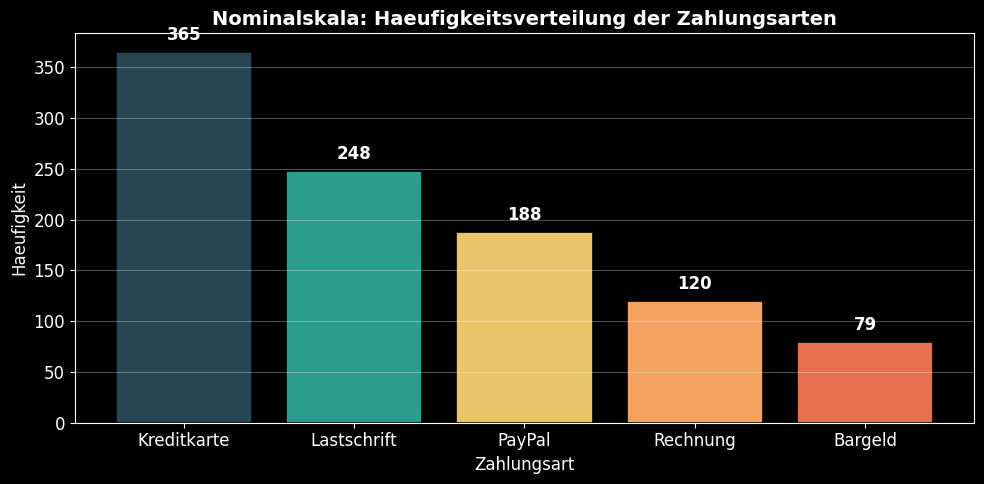

In [7]:
# Nominalskala: Zahlungsarten -- nur Haeufigkeiten sind sinnvoll

np.random.seed(42)

zahlungsarten = np.random.choice(
    ['Kreditkarte', 'Lastschrift', 'PayPal', 'Rechnung', 'Bargeld'],
    size=1000,
    p=[0.35, 0.25, 0.20, 0.12, 0.08]
)

counts = Counter(zahlungsarten)
sorted_pairs = sorted(counts.items(), key=lambda x: x[1], reverse=True)
arten_s = [p[0] for p in sorted_pairs]
haeuf_s = [p[1] for p in sorted_pairs]

print("=" * 60)
print("NOMINALSKALA: Zahlungsarten (1.000 Bestellungen)")
print("=" * 60)
print(f"\nModus (haeufigster Wert): {arten_s[0]} ({haeuf_s[0]}x)")
print(f"\n!! Ein Mittelwert von Zahlungsarten ist SINNLOS!")
print("   Man kann nicht rechnen: (Kreditkarte + Bargeld) / 2 = ???")
print("   -> Bei Nominalskala sind nur Haeufigkeiten und Modus zulaessig.")

colors = ['#264653', '#2A9D8F', '#E9C46A', '#F4A261', '#E76F51']
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(arten_s, haeuf_s, color=colors[:len(arten_s)], edgecolor='black', linewidth=1.2)
for bar in bars:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., h + 8, f'{int(h)}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')
ax.set_ylabel('Haeufigkeit')
ax.set_xlabel('Zahlungsart')
ax.set_title('Nominalskala: Haeufigkeitsverteilung der Zahlungsarten', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 2.2 Ordinalskala

- **Geordnete Kategorien ohne interpretierbare Abstaende**
- Erlaubte Operationen: Gleichheit + Ordnung (<, >, <=, >=)
- Auswertungen: Median, Quartile, Rangmasse (Mittelwert nur mit Vorsicht!)

**Beispiele:** Schulnoten (1-6), Kundenbewertung (1-5 Sterne), Zufriedenheitsskala, Rankings

**Achtung:** Der Abstand zwischen den Stufen ist *nicht* notwendigerweise gleich!  
Ist der Sprung von 1 auf 2 Sterne wirklich gleich gross wie von 4 auf 5?

ORDINALSKALA: Kundenbewertungen (800 Rezensionen)
  1 Stern   :  41  (5.1 %)
  2 Sterne  :  77  (9.6 %)
  3 Sterne  : 169  (21.1 %)
  4 Sterne  : 309  (38.6 %)
  5 Sterne  : 204  (25.5 %)

Median: 4 Sterne (sinnvoll)
Mittelwert: 3.70 Sterne (Interpretation fragwuerdig!)

-> Der Median ist bei Ordinalskala der geeignete Lageparameter.
   Ein Mittelwert setzt gleiche Abstaende voraus -- das ist hier nicht gegeben!


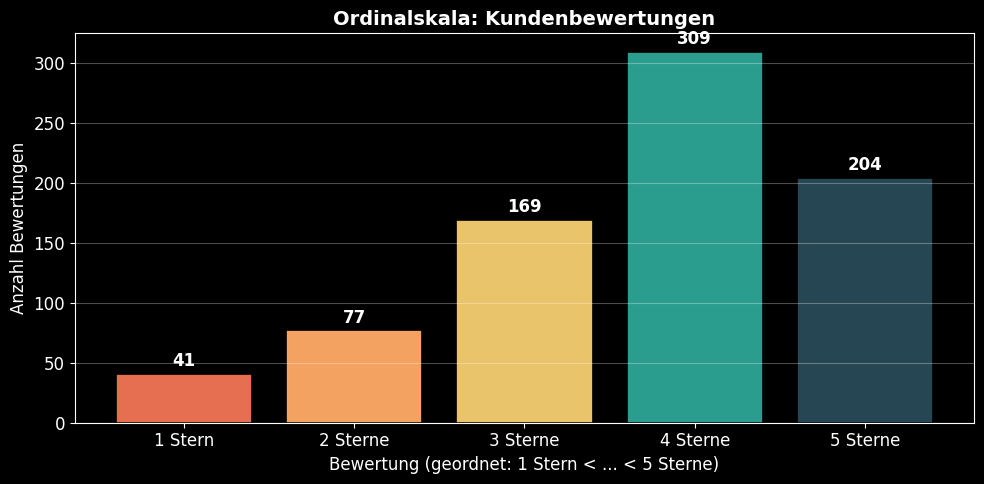

In [8]:
# Ordinalskala: Kundenbewertungen (1-5 Sterne)

np.random.seed(42)

sterne_labels = ['1 Stern', '2 Sterne', '3 Sterne', '4 Sterne', '5 Sterne']
bew_data = np.random.choice(sterne_labels, size=800, p=[0.05, 0.08, 0.22, 0.40, 0.25])

counts_bew = {s: 0 for s in sterne_labels}
for b in bew_data:
    counts_bew[b] += 1

ordinal_map = {'1 Stern': 1, '2 Sterne': 2, '3 Sterne': 3, '4 Sterne': 4, '5 Sterne': 5}
numerisch = [ordinal_map[b] for b in bew_data]
median_val = np.median(numerisch)

print("=" * 60)
print("ORDINALSKALA: Kundenbewertungen (800 Rezensionen)")
print("=" * 60)
for label in sterne_labels:
    print(f"  {label:10s}: {counts_bew[label]:3d}  ({counts_bew[label]/8:.1f} %)")
print(f"\nMedian: {median_val:.0f} Sterne (sinnvoll)")
print(f"Mittelwert: {np.mean(numerisch):.2f} Sterne (Interpretation fragwuerdig!)")
print(f"\n-> Der Median ist bei Ordinalskala der geeignete Lageparameter.")
print(f"   Ein Mittelwert setzt gleiche Abstaende voraus -- das ist hier nicht gegeben!")

colors_bew = ['#E76F51', '#F4A261', '#E9C46A', '#2A9D8F', '#264653']
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(sterne_labels, [counts_bew[s] for s in sterne_labels],
              color=colors_bew, edgecolor='black', linewidth=1.2)
for bar in bars:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., h + 3, f'{int(h)}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')
ax.set_ylabel('Anzahl Bewertungen')
ax.set_xlabel('Bewertung (geordnet: 1 Stern < ... < 5 Sterne)')
ax.set_title('Ordinalskala: Kundenbewertungen', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 2.3 Metrische Skala

Numerisch mit **interpretierbaren Abstaenden**. Alle arithmetischen Operationen sind erlaubt.

Man unterscheidet:

- **Intervallskala:** Kein natuerlicher Nullpunkt  
  *Beispiele:* Temperatur in Grad Celsius, Datum nach christlicher Zeitrechnung

- **Verhaeltnisskala:** Natuerlicher Nullpunkt (0 = nichts davon)  
  *Beispiele:* Gewicht (kg), Umsatz (EUR), Lieferzeit (Tage), Koerpergroesse (cm)

METRISCHE SKALA (Verhaeltnis): Fuellgewichte (Soll: 500 g)

Anzahl Messungen: 500

Zulaessige Lagemasse:
  Median:             500.06 g
  Arithm. Mittelwert: 500.03 g  <-- JETZT sinnvoll!

Zulaessige Streuungsmasse:
  Varianz:            24.07 g^2
  Standardabweichung: 4.91 g

Verhaeltnisaussagen:
  0 g = kein Gewicht (natuerlicher Nullpunkt)
  1000 g ist doppelt so schwer wie 500 g (Verhaeltnisse interpretierbar)


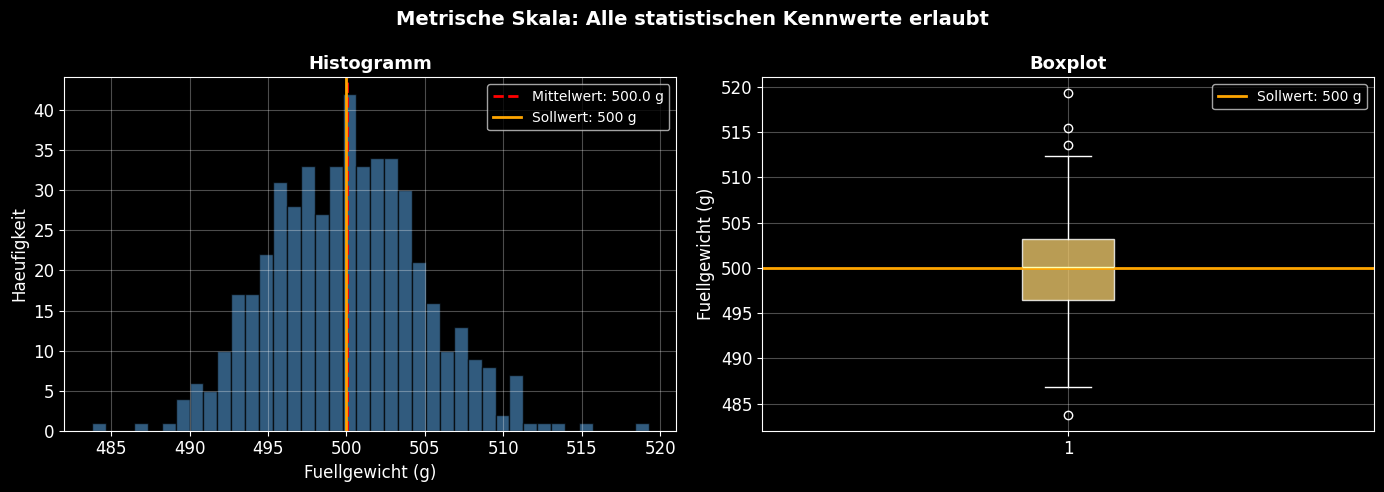

In [9]:
# Metrische Skala: Fuellgewichte (Verhaeltnisskala) -- Qualitaetskontrolle

np.random.seed(42)
fuellgewichte = np.random.normal(loc=500, scale=5, size=500)

print("=" * 60)
print("METRISCHE SKALA (Verhaeltnis): Fuellgewichte (Soll: 500 g)")
print("=" * 60)
print(f"\nAnzahl Messungen: {len(fuellgewichte)}")
print(f"\nZulaessige Lagemasse:")
print(f"  Median:             {np.median(fuellgewichte):.2f} g")
print(f"  Arithm. Mittelwert: {np.mean(fuellgewichte):.2f} g  <-- JETZT sinnvoll!")
print(f"\nZulaessige Streuungsmasse:")
print(f"  Varianz:            {np.var(fuellgewichte, ddof=1):.2f} g^2")
print(f"  Standardabweichung: {np.std(fuellgewichte, ddof=1):.2f} g")
print(f"\nVerhaeltnisaussagen:")
print(f"  0 g = kein Gewicht (natuerlicher Nullpunkt)")
print(f"  1000 g ist doppelt so schwer wie 500 g (Verhaeltnisse interpretierbar)")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.hist(fuellgewichte, bins=40, edgecolor='black', alpha=0.7, color='steelblue')
ax1.axvline(np.mean(fuellgewichte), color='red', linestyle='--', linewidth=2,
            label=f'Mittelwert: {np.mean(fuellgewichte):.1f} g')
ax1.axvline(500, color='orange', linestyle='-', linewidth=2, label='Sollwert: 500 g')
ax1.set_xlabel('Fuellgewicht (g)')
ax1.set_ylabel('Haeufigkeit')
ax1.set_title('Histogramm', fontsize=13, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(alpha=0.3)

ax2.boxplot(fuellgewichte, vert=True, patch_artist=True,
            boxprops=dict(facecolor='#E9C46A', alpha=0.8))
ax2.axhline(500, color='orange', linestyle='-', linewidth=2, label='Sollwert: 500 g')
ax2.set_ylabel('Fuellgewicht (g)')
ax2.set_title('Boxplot', fontsize=13, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(alpha=0.3)

plt.suptitle('Metrische Skala: Alle statistischen Kennwerte erlaubt', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 2.4 Achtung: Nicht jede Zahl ist metrisch!

Viele Daten *sehen* numerisch aus, sind aber **nicht metrisch**.

| Merkmal | Sieht aus wie... | Tatsaechliches Skalenniveau |
|:--------|:-----------------|:--------------------------|
| Postleitzahl (70173) | Zahl | **Nominal** |
| Telefonnummer | Zahl | **Nominal** |
| Artikelnummer (4711) | Zahl | **Nominal** |
| Schulnote (1-6) | Zahl | **Ordinal** |
| Platzierung in einem Wettbewerb | Zahl | **Ordinal** |

In [10]:
# Haeufiger Fehler: Postleitzahlen als metrisch behandeln

plz = [70173, 10115, 80331, 20095, 50667, 70173, 10115, 70173, 80331, 60311]

print("=" * 60)
print("!! FEHLER: Postleitzahlen als metrisch behandeln")
print("=" * 60)
print(f"\nPostleitzahlen: {plz}")
print(f"\n'Mittelwert': {np.mean(plz):.0f}")
print(f"-> Was soll eine PLZ von {np.mean(plz):.0f} bedeuten?")
print(f"   Ist PLZ 80000 'doppelt so viel' wie PLZ 40000? Nein!")
print(f"   Ist der Abstand 10000->20000 gleich dem von 70000->80000? Nein!")
print(f"\nKORREKTE Auswertung (Nominalskala):")
counter = Counter(plz)
stadt = {70173: 'Stuttgart', 10115: 'Berlin', 80331: 'Muenchen',
         20095: 'Hamburg', 50667: 'Koeln', 60311: 'Frankfurt'}
for p, count in counter.most_common():
    print(f"   {p} ({stadt.get(p, '?'):12s}): {count}x")
print(f"   Modus: {counter.most_common(1)[0][0]} (haeufigste PLZ)")

!! FEHLER: Postleitzahlen als metrisch behandeln

Postleitzahlen: [70173, 10115, 80331, 20095, 50667, 70173, 10115, 70173, 80331, 60311]

'Mittelwert': 52248
-> Was soll eine PLZ von 52248 bedeuten?
   Ist PLZ 80000 'doppelt so viel' wie PLZ 40000? Nein!
   Ist der Abstand 10000->20000 gleich dem von 70000->80000? Nein!

KORREKTE Auswertung (Nominalskala):
   70173 (Stuttgart   ): 3x
   10115 (Berlin      ): 2x
   80331 (Muenchen    ): 2x
   20095 (Hamburg     ): 1x
   50667 (Koeln       ): 1x
   60311 (Frankfurt   ): 1x
   Modus: 70173 (haeufigste PLZ)


### 2.5 Zusammenfassung: Uebersicht der Skalentypen

In [11]:
tabelle = {
    'Skalenniveau': ['Nominal', 'Ordinal', 'Intervall', 'Verhaeltnis'],
    'Erlaubte Operationen': ['=, !=', '=, !=, <, >', '=, !=, <, >, +, -', '=, !=, <, >, +, -, *, /'],
    'Lagemasse': ['Modus', 'Modus, Median', 'Modus, Median, Mittelwert', 'Modus, Median, Mittelwert'],
    'Beispiel': ['Geschlecht, PLZ, Farbe', 'Schulnoten, Rankings', 'Temperatur (C), Datum', 'Gewicht, Umsatz, Laenge'],
    'Nullpunkt': ['--', '--', 'Willkuerlich', 'Natuerlich (0 = nichts)']
}

df_sk = pd.DataFrame(tabelle)
print("=" * 90)
print("UEBERSICHT: SKALENTYPEN")
print("=" * 90)
print()
print(df_sk.to_string(index=False))
print("\nMerksatz: Nicht jede Zahl ist metrisch (z. B. Postleitzahlen, Artikelnummern, Telefonnummern).")

UEBERSICHT: SKALENTYPEN

Skalenniveau    Erlaubte Operationen                 Lagemasse                Beispiel               Nullpunkt
     Nominal                   =, !=                     Modus  Geschlecht, PLZ, Farbe                      --
     Ordinal             =, !=, <, >             Modus, Median    Schulnoten, Rankings                      --
   Intervall       =, !=, <, >, +, - Modus, Median, Mittelwert   Temperatur (C), Datum            Willkuerlich
 Verhaeltnis =, !=, <, >, +, -, *, / Modus, Median, Mittelwert Gewicht, Umsatz, Laenge Natuerlich (0 = nichts)

Merksatz: Nicht jede Zahl ist metrisch (z. B. Postleitzahlen, Artikelnummern, Telefonnummern).


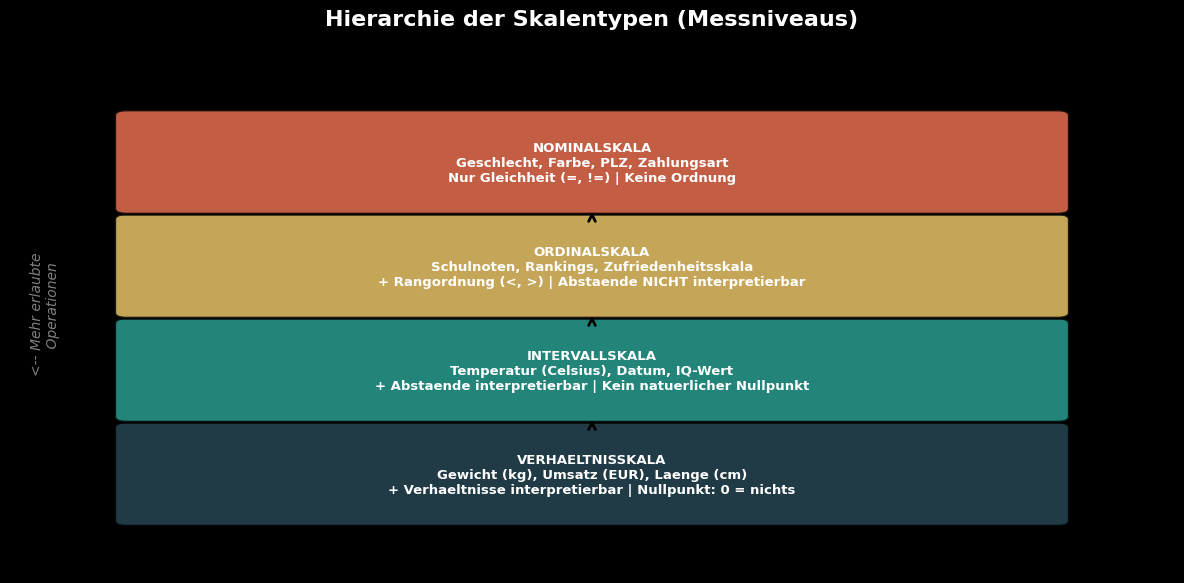

In [12]:
# Visualisierung: Skalentypen als Hierarchie

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

levels = [
    (1, 1, 8, 1.8, '#264653',
     'VERHAELTNISSKALA\nGewicht (kg), Umsatz (EUR), Laenge (cm)\n+ Verhaeltnisse interpretierbar | Nullpunkt: 0 = nichts'),
    (1, 3, 8, 1.8, '#2A9D8F',
     'INTERVALLSKALA\nTemperatur (Celsius), Datum, IQ-Wert\n+ Abstaende interpretierbar | Kein natuerlicher Nullpunkt'),
    (1, 5, 8, 1.8, '#E9C46A',
     'ORDINALSKALA\nSchulnoten, Rankings, Zufriedenheitsskala\n+ Rangordnung (<, >) | Abstaende NICHT interpretierbar'),
    (1, 7, 8, 1.8, '#E76F51',
     'NOMINALSKALA\nGeschlecht, Farbe, PLZ, Zahlungsart\nNur Gleichheit (=, !=) | Keine Ordnung')
]

for x, y, w, h, color, text in levels:
    rect = mpatches.FancyBboxPatch((x, y), w, h, boxstyle="round,pad=0.1",
                                    facecolor=color, edgecolor='black', linewidth=2, alpha=0.85)
    ax.add_patch(rect)
    ax.text(x + w/2, y + h/2, text, ha='center', va='center',
            fontsize=9.5, fontweight='bold', color='white')

for i in range(3):
    y_start = levels[i+1][1]
    y_end = levels[i][1] + levels[i][3]
    ax.annotate('', xy=(5, y_start), xytext=(5, y_end),
                arrowprops=dict(arrowstyle='->', color='black', lw=2))

ax.text(0.3, 5, '<-- Mehr erlaubte\n    Operationen', ha='center', va='center',
        fontsize=10, style='italic', color='gray', rotation=90)
ax.set_title('Hierarchie der Skalentypen (Messniveaus)', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

---

## 3. Deskriptive vs. Induktive Statistik

Die Statistik gliedert sich in zwei Hauptbereiche mit grundlegend verschiedenen Zielsetzungen.

### 3.1 Deskriptive Statistik

Beschreibt den **vorliegenden Datensatz**:
- Haeufigkeitstabellen und Diagramme
- Lage- und Streuungsmasse
- Leitfrage: *Wie sehen die Daten aus?*

### 3.2 Induktive Statistik (schliessende Statistik)

Schliesst von der **Stichprobe auf die Grundgesamtheit**:
- Punktschaetzungen
- Konfidenzintervalle
- Hypothesentests

> **Kernidee:** Induktive Aussagen sind nie absolut sicher,  
> sie besitzen ein **Konfidenz- oder Signifikanzniveau**.

In [13]:
# Beispiel: Deskriptive vs. Induktive Statistik
# Vergleich zweier Produktionslinien (Fuellgewicht, Soll: 500 g)

np.random.seed(42)
from scipy import stats

n_a, n_b = 150, 150
linie_a = np.random.normal(loc=501.5, scale=4.5, size=n_a)
linie_b = np.random.normal(loc=499.8, scale=3.8, size=n_b)

print("=" * 70)
print("VERGLEICH ZWEIER PRODUKTIONSLINIEN: Fuellgewicht (Soll: 500 g)")
print("=" * 70)

print("\n--- DESKRIPTIVE STATISTIK ---")
print("Beschreibt NUR die vorliegenden Stichprobendaten:\n")
print(f"  Linie A: Mittelwert = {np.mean(linie_a):.2f} g,  Std.abw. = {np.std(linie_a, ddof=1):.2f} g")
print(f"  Linie B: Mittelwert = {np.mean(linie_b):.2f} g,  Std.abw. = {np.std(linie_b, ddof=1):.2f} g")
print(f"  Differenz:  {np.mean(linie_a) - np.mean(linie_b):.2f} g")

print("\n--- INDUKTIVE STATISTIK ---")
print("Schliesst von der Stichprobe auf die GESAMTE Produktion:\n")
t_stat, p_value = stats.ttest_ind(linie_a, linie_b)
print(f"  t-Test: t = {t_stat:.3f}, p-Wert = {p_value:.4f}")
if p_value < 0.05:
    print(f"  -> p < 0.05: Der Unterschied ist statistisch signifikant.")
else:
    print(f"  -> p >= 0.05: Der Unterschied ist NICHT statistisch signifikant.")
print(f"\n!! Induktive Aussagen sind NIE absolut sicher (Fehlerwahrscheinlichkeit alpha = 5 %).")

VERGLEICH ZWEIER PRODUKTIONSLINIEN: Fuellgewicht (Soll: 500 g)

--- DESKRIPTIVE STATISTIK ---
Beschreibt NUR die vorliegenden Stichprobendaten:

  Linie A: Mittelwert = 501.13 g,  Std.abw. = 4.24 g
  Linie B: Mittelwert = 500.07 g,  Std.abw. = 3.88 g
  Differenz:  1.06 g

--- INDUKTIVE STATISTIK ---
Schliesst von der Stichprobe auf die GESAMTE Produktion:

  t-Test: t = 2.256, p-Wert = 0.0248
  -> p < 0.05: Der Unterschied ist statistisch signifikant.

!! Induktive Aussagen sind NIE absolut sicher (Fehlerwahrscheinlichkeit alpha = 5 %).


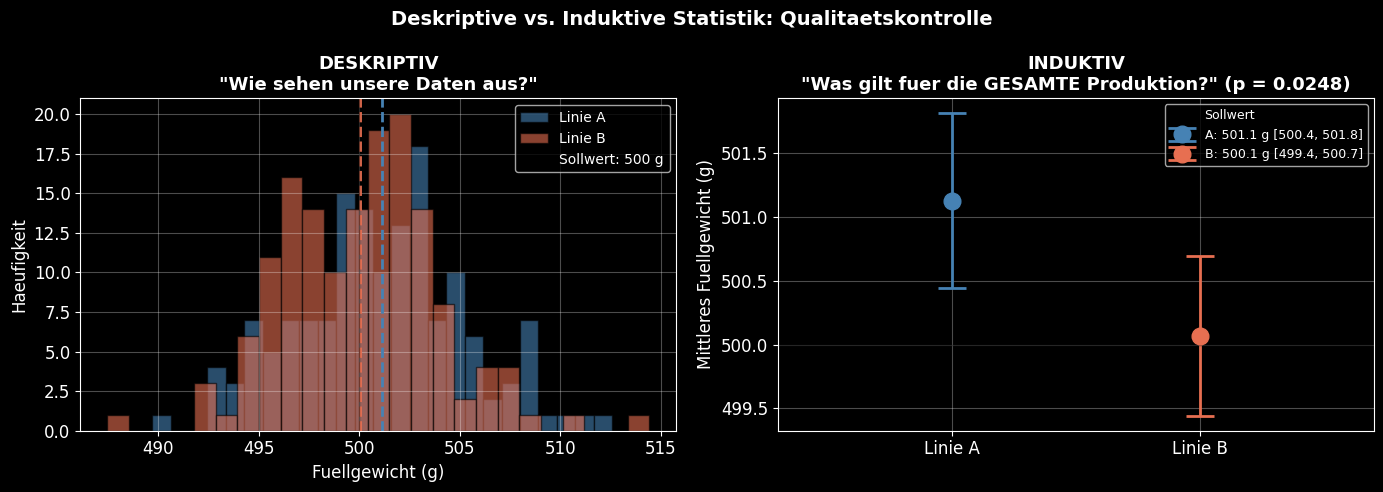

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.hist(linie_a, bins=25, alpha=0.6, color='steelblue', edgecolor='black', label='Linie A')
ax1.hist(linie_b, bins=25, alpha=0.6, color='#E76F51', edgecolor='black', label='Linie B')
ax1.axvline(np.mean(linie_a), color='steelblue', linestyle='--', linewidth=2)
ax1.axvline(np.mean(linie_b), color='#E76F51', linestyle='--', linewidth=2)
ax1.axvline(500, color='black', linestyle='-', linewidth=1, alpha=0.5, label='Sollwert: 500 g')
ax1.set_xlabel('Fuellgewicht (g)')
ax1.set_ylabel('Haeufigkeit')
ax1.set_title('DESKRIPTIV\n"Wie sehen unsere Daten aus?"', fontsize=13, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(alpha=0.3)

ci_a = stats.t.interval(0.95, df=n_a-1, loc=np.mean(linie_a), scale=stats.sem(linie_a))
ci_b = stats.t.interval(0.95, df=n_b-1, loc=np.mean(linie_b), scale=stats.sem(linie_b))

ax2.errorbar(1, np.mean(linie_a),
             yerr=[[np.mean(linie_a)-ci_a[0]], [ci_a[1]-np.mean(linie_a)]],
             fmt='o', markersize=12, color='steelblue', capsize=10, capthick=2, linewidth=2,
             label=f'A: {np.mean(linie_a):.1f} g [{ci_a[0]:.1f}, {ci_a[1]:.1f}]')
ax2.errorbar(2, np.mean(linie_b),
             yerr=[[np.mean(linie_b)-ci_b[0]], [ci_b[1]-np.mean(linie_b)]],
             fmt='o', markersize=12, color='#E76F51', capsize=10, capthick=2, linewidth=2,
             label=f'B: {np.mean(linie_b):.1f} g [{ci_b[0]:.1f}, {ci_b[1]:.1f}]')
ax2.axhline(500, color='black', linestyle='-', linewidth=1, alpha=0.5, label='Sollwert')
ax2.set_xticks([1, 2])
ax2.set_xticklabels(['Linie A', 'Linie B'])
ax2.set_ylabel('Mittleres Fuellgewicht (g)')
ax2.set_title(f'INDUKTIV\n"Was gilt fuer die GESAMTE Produktion?" (p = {p_value:.4f})', fontsize=13, fontweight='bold')
ax2.legend(fontsize=9)
ax2.set_xlim(0.3, 2.7)
ax2.grid(alpha=0.3)

plt.suptitle('Deskriptive vs. Induktive Statistik: Qualitaetskontrolle', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

---

## 4. Typischer Statistik-Workflow

Der typische Ablauf einer statistischen Analyse folgt diesen Schritten:

1. **Fragestellung praezisieren**
2. **Grundgesamtheit definieren**
3. **Stichprobenplan / Datenerhebung**
4. **Daten bereinigen** (Fehler, Missing Values, Ausreisser)
5. **Deskriptive Auswertung**
6. **Modellannahmen formulieren**
7. **Induktiv schliessen**
8. **Interpretation im Kontext**

Wir durchlaufen diesen Workflow an einem Beispiel aus der Qualitaetskontrolle:

In [15]:
# SCHRITT 1 + 2: Fragestellung und Grundgesamtheit

print("SCHRITT 1: Fragestellung")
print("=" * 60)
print("  Haelt unsere Abfuellanlage den Sollwert von 500 g ein?")
print("  Liegt das mittlere Fuellgewicht innerhalb der Toleranz (+/- 15 g)?")
print()
print("SCHRITT 2: Grundgesamtheit")
print("=" * 60)
print("  Grundgesamtheit: Alle 25.000 Packungen der letzten Woche")
print("  Stichprobe:      300 zufaellig entnommene Packungen")

SCHRITT 1: Fragestellung
  Haelt unsere Abfuellanlage den Sollwert von 500 g ein?
  Liegt das mittlere Fuellgewicht innerhalb der Toleranz (+/- 15 g)?

SCHRITT 2: Grundgesamtheit
  Grundgesamtheit: Alle 25.000 Packungen der letzten Woche
  Stichprobe:      300 zufaellig entnommene Packungen


In [16]:
# SCHRITT 3: Datenerhebung (Simulation)

np.random.seed(42)
n_sample = 300
gewichte_raw = np.random.normal(loc=499.5, scale=4.8, size=n_sample)

# Problematische Datenpunkte einfuegen
gewichte_raw[10] = -2.5       # Messfehler
gewichte_raw[42] = np.nan     # Fehlender Wert
gewichte_raw[99] = np.nan     # Fehlender Wert
gewichte_raw[200] = 650       # Extremer Ausreisser
gewichte_raw[250] = 380       # Extremer Ausreisser

print("SCHRITT 3: Datenerhebung")
print("=" * 60)
print(f"Erhobene Datenpunkte: {n_sample}")
print(f"Erste 10 Werte (g): {np.round(gewichte_raw[:10], 1)}")
print(f"\n!! Rohdaten enthalten oft Fehler -- daher folgt die Bereinigung!")

SCHRITT 3: Datenerhebung
Erhobene Datenpunkte: 300
Erste 10 Werte (g): [501.9 498.8 502.6 506.8 498.4 498.4 507.1 503.2 497.2 502.1]

!! Rohdaten enthalten oft Fehler -- daher folgt die Bereinigung!


In [17]:
# SCHRITT 4: Daten bereinigen

print("SCHRITT 4: Datenbereinigung")
print("=" * 60)

n_miss = np.sum(np.isnan(gewichte_raw))
print(f"\n1. Missing Values: {n_miss} -> entfernt")
clean = gewichte_raw[~np.isnan(gewichte_raw)]

n_neg = np.sum(clean < 0)
print(f"2. Negative Werte: {n_neg} -> entfernt (Messfehler)")
clean = clean[clean >= 0]

n_out = np.sum((clean > 600) | (clean < 400))
print(f"3. Extreme Ausreisser (< 400 g oder > 600 g): {n_out} -> entfernt")
clean = clean[(clean >= 400) & (clean <= 600)]

print(f"\nNach Bereinigung: {len(clean)} von {n_sample} Datenpunkten")
print(f"Entfernt: {n_sample - len(clean)} ({(n_sample - len(clean))/n_sample*100:.1f} %)")

SCHRITT 4: Datenbereinigung

1. Missing Values: 2 -> entfernt
2. Negative Werte: 1 -> entfernt (Messfehler)
3. Extreme Ausreisser (< 400 g oder > 600 g): 2 -> entfernt

Nach Bereinigung: 295 von 300 Datenpunkten
Entfernt: 5 (1.7 %)


SCHRITT 5: Deskriptive Auswertung

Anzahl: 295
Mittelwert:    499.50 g
Median:        499.81 g
Std.abw.:      4.75 g
Min / Max:     483.94 / 517.99 g
25%/75%-Perz.: 496.20 / 502.53 g


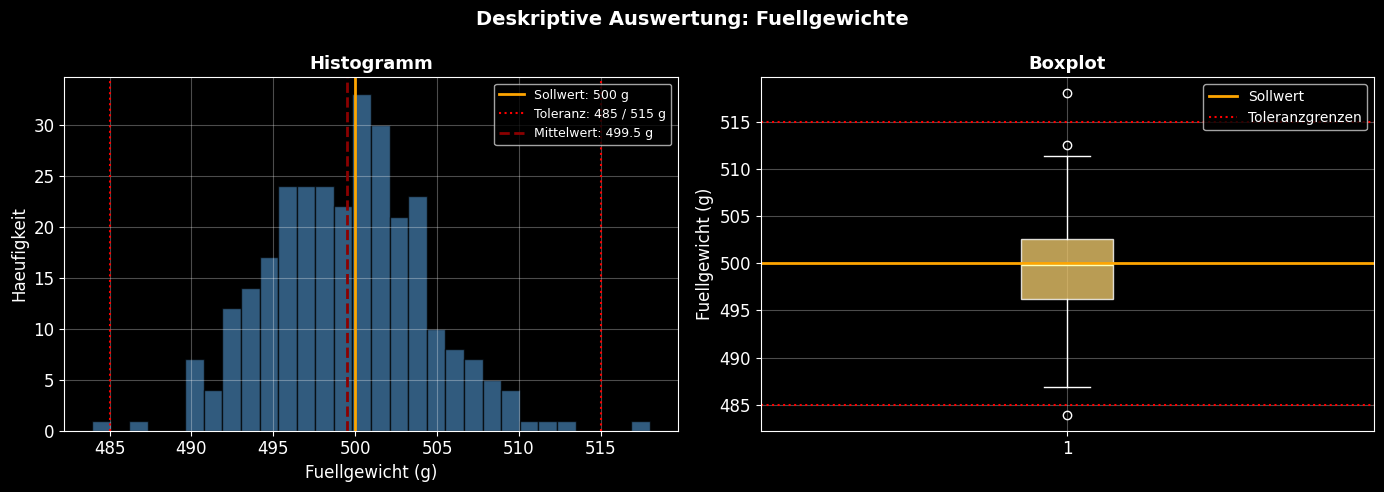

In [18]:
# SCHRITT 5: Deskriptive Auswertung

print("SCHRITT 5: Deskriptive Auswertung")
print("=" * 60)
print(f"\nAnzahl: {len(clean)}")
print(f"Mittelwert:    {np.mean(clean):.2f} g")
print(f"Median:        {np.median(clean):.2f} g")
print(f"Std.abw.:      {np.std(clean, ddof=1):.2f} g")
print(f"Min / Max:     {np.min(clean):.2f} / {np.max(clean):.2f} g")
print(f"25%/75%-Perz.: {np.percentile(clean, 25):.2f} / {np.percentile(clean, 75):.2f} g")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.hist(clean, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
ax1.axvline(500, color='orange', linestyle='-', linewidth=2, label='Sollwert: 500 g')
ax1.axvline(485, color='red', linestyle=':', linewidth=1.5, label='Toleranz: 485 / 515 g')
ax1.axvline(515, color='red', linestyle=':', linewidth=1.5)
ax1.axvline(np.mean(clean), color='darkred', linestyle='--', linewidth=2,
            label=f'Mittelwert: {np.mean(clean):.1f} g')
ax1.set_xlabel('Fuellgewicht (g)')
ax1.set_ylabel('Haeufigkeit')
ax1.set_title('Histogramm', fontsize=13, fontweight='bold')
ax1.legend(fontsize=9)
ax1.grid(alpha=0.3)

ax2.boxplot(clean, vert=True, patch_artist=True, boxprops=dict(facecolor='#E9C46A', alpha=0.8))
ax2.axhline(500, color='orange', linestyle='-', linewidth=2, label='Sollwert')
ax2.axhline(485, color='red', linestyle=':', linewidth=1.5, label='Toleranzgrenzen')
ax2.axhline(515, color='red', linestyle=':', linewidth=1.5)
ax2.set_ylabel('Fuellgewicht (g)')
ax2.set_title('Boxplot', fontsize=13, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(alpha=0.3)

plt.suptitle('Deskriptive Auswertung: Fuellgewichte', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [19]:
# SCHRITT 6 + 7: Modellannahmen und induktiver Schluss

from scipy import stats

print("SCHRITT 6: Modellannahmen")
print("=" * 60)
print(f"  Zufaellige Stichprobe, n = {len(clean)} > 30")
print(f"  Fuellgewichte approximativ normalverteilt")
print(f"  H0: mu = 500 g   (Anlage arbeitet korrekt)")
print(f"  H1: mu != 500 g  (systematische Abweichung)")
print(f"  alpha = 0.05")

sollwert = 500
t_stat, p_val = stats.ttest_1samp(clean, sollwert)
ci = stats.t.interval(0.95, df=len(clean)-1, loc=np.mean(clean), scale=stats.sem(clean))

print(f"\nSCHRITT 7: Induktiver Schluss")
print("=" * 60)
print(f"  t = {t_stat:.3f},  p = {p_val:.4f}")
print(f"  95%-KI fuer mu: [{ci[0]:.2f} g, {ci[1]:.2f} g]")
if p_val < 0.05:
    print(f"\n  -> H0 abgelehnt: signifikante Abweichung vom Sollwert.")
else:
    print(f"\n  -> H0 nicht abgelehnt: keine signifikante Abweichung nachweisbar.")

SCHRITT 6: Modellannahmen
  Zufaellige Stichprobe, n = 295 > 30
  Fuellgewichte approximativ normalverteilt
  H0: mu = 500 g   (Anlage arbeitet korrekt)
  H1: mu != 500 g  (systematische Abweichung)
  alpha = 0.05

SCHRITT 7: Induktiver Schluss
  t = -1.806,  p = 0.0720
  95%-KI fuer mu: [498.96 g, 500.04 g]

  -> H0 nicht abgelehnt: keine signifikante Abweichung nachweisbar.


In [20]:
# SCHRITT 8: Interpretation im Kontext

print("SCHRITT 8: Interpretation")
print("=" * 60)
print(f"\nSollwert: {sollwert} g | Toleranz: +/- 15 g")
print(f"Stichprobenmittelwert: {np.mean(clean):.2f} g")
print(f"95%-KI: [{ci[0]:.2f}, {ci[1]:.2f}] g")

if ci[0] >= 485 and ci[1] <= 515:
    print(f"\nFazit: Das KI liegt innerhalb der Toleranzgrenzen [485, 515] g.")
    print(f"Die Anlage arbeitet innerhalb der zulaessigen Toleranz.")
else:
    print(f"\nFazit: Das KI ragt ueber die Toleranzgrenzen hinaus.")
    print(f"Eine Neukalibrierung der Anlage wird empfohlen.")

print(f"\nEinschraenkungen:")
print(f"  - Nur eine Produktionswoche betrachtet")
print(f"  - Extreme Ausreisser wurden entfernt")
print(f"  - Moegliche Drift ueber die Woche nicht beruecksichtigt")
print(f"  - Test bezieht sich auf den Mittelwert, nicht auf Einzelpackungen")

SCHRITT 8: Interpretation

Sollwert: 500 g | Toleranz: +/- 15 g
Stichprobenmittelwert: 499.50 g
95%-KI: [498.96, 500.04] g

Fazit: Das KI liegt innerhalb der Toleranzgrenzen [485, 515] g.
Die Anlage arbeitet innerhalb der zulaessigen Toleranz.

Einschraenkungen:
  - Nur eine Produktionswoche betrachtet
  - Extreme Ausreisser wurden entfernt
  - Moegliche Drift ueber die Woche nicht beruecksichtigt
  - Test bezieht sich auf den Mittelwert, nicht auf Einzelpackungen


---

## Zusammenfassung

| Konzept | Kernaussage |
|:--------|:------------|
| **Statistische Einheit** | Das Objekt der Untersuchung (z. B. ein Bauteil, ein Kunde) |
| **Merkmal / Auspraegung** | Eigenschaft der Einheit / konkreter beobachteter Wert |
| **Grundgesamtheit** | Alle relevanten Einheiten |
| **Stichprobe** | Tatsaechlich beobachtete Teilmenge |
| **Bias** | Systematische Verzerrung -> falsche Schluesse |
| **Nominalskala** | Kategorien ohne Ordnung (nur = / !=) |
| **Ordinalskala** | Geordnete Kategorien (+ < / >) |
| **Intervallskala** | Interpretierbare Abstaende, kein natuerlicher Nullpunkt |
| **Verhaeltnisskala** | Natuerlicher Nullpunkt, Verhaeltnisse interpretierbar |
| **Deskriptive Statistik** | Beschreibt den vorliegenden Datensatz |
| **Induktive Statistik** | Schliesst von Stichprobe auf Grundgesamtheit |

> **Merksaetze:**  
> - Nicht jede Zahl ist metrisch!  
> - Das Skalenniveau bestimmt die zulaessigen Auswertungen.  
> - Induktive Aussagen sind nie absolut sicher -- sie haben eine Fehlerwahrscheinlichkeit.  
> - Achte auf Bias bei der Datenerhebung!